# USB PD Analysis with usbpdpy

This notebook demonstrates how to use the `usbpdpy` package for analyzing USB Power Delivery messages.

`usbpdpy` provides fast Python bindings to the Rust `usbpd` crate for parsing USB PD protocol messages.


## Setup and Imports


In [2]:
import usbpdpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ usbpdpy imported successfully!")
print(f"Available functions: {[func for func in dir(usbpdpy) if not func.startswith('_')]}")


✅ usbpdpy imported successfully!
Available functions: ['PyPdDataObject', 'PyPdHeader', 'PyPdMessage', 'bytes_to_hex', 'get_message_type_name', 'hex_to_bytes', 'parse_pd_message', 'parse_pd_messages', 'usbpdpy']


## Basic Usage Examples


In [3]:
# Example 1: Parse a single USB PD message from hex string
hex_message = "1161"  # Example GoodCRC message

# Convert hex to bytes
message_bytes = usbpdpy.hex_to_bytes(hex_message)
print(f"Hex: {hex_message} -> Bytes: {message_bytes}")

# Parse the message
message = usbpdpy.parse_pd_message(message_bytes)

print(f"\n📦 Parsed Message:")
print(f"  Type: {message.header.message_type}")
print(f"  Name: {usbpdpy.get_message_type_name(message.header.message_type)}")
print(f"  Data Role: {message.header.port_data_role}")
print(f"  Power Role: {message.header.port_power_role}")
print(f"  Message ID: {message.header.message_id}")
print(f"  Data Objects: {message.header.number_of_data_objects}")
print(f"  Extended: {message.header.extended}")
print(f"  Raw Hex: {message.get_hex()}")


Hex: 1161 -> Bytes: b'\x11a'

📦 Parsed Message:
  Type: 17
  Name: Get_Source_Cap_Extended
  Data Role: UFP
  Power Role: Source
  Message ID: 0
  Data Objects: 6
  Extended: False
  Raw Hex: 1161


In [4]:
# Example 2: Parse multiple messages
test_messages = [
    "1161",  # Get_Source_Cap_Extended
    "0143",  # GoodCRC  
    "0744",  # Get_Source_Cap
    "0865",  # Get_Sink_Cap
    "0A01",  # PR_Swap
    "0C01",  # Wait
    "0D01",  # Soft_Reset
]

print("📊 Parsing multiple USB PD messages:")
print("=" * 50)

parsed_messages = []
for i, hex_msg in enumerate(test_messages, 1):
    try:
        msg_bytes = usbpdpy.hex_to_bytes(hex_msg)
        message = usbpdpy.parse_pd_message(msg_bytes)
        
        parsed_messages.append({
            'hex': hex_msg,
            'type': message.header.message_type,
            'name': usbpdpy.get_message_type_name(message.header.message_type),
            'data_role': message.header.port_data_role,
            'power_role': message.header.port_power_role,
            'message_id': message.header.message_id,
            'data_objects': message.header.number_of_data_objects,
            'extended': message.header.extended
        })
        
        print(f"{i:2d}. {hex_msg} -> {usbpdpy.get_message_type_name(message.header.message_type)}")
        
    except Exception as e:
        print(f"{i:2d}. {hex_msg} -> ❌ Error: {e}")

print(f"\n✅ Successfully parsed {len(parsed_messages)} messages")


📊 Parsing multiple USB PD messages:
 1. 1161 -> Get_Source_Cap_Extended
 2. 0143 -> GoodCRC
 3. 0744 -> Get_Source_Cap
 4. 0865 -> Get_Sink_Cap
 5. 0A01 -> PR_Swap
 6. 0C01 -> Wait
 7. 0D01 -> Soft_Reset

✅ Successfully parsed 7 messages


## Data Analysis with Pandas


In [5]:
# Convert parsed messages to DataFrame for analysis
df = pd.DataFrame(parsed_messages)

print("📊 USB PD Messages DataFrame:")
print(df)

print(f"\n📈 Summary Statistics:")
print(f"  Total messages: {len(df)}")
print(f"  Unique message types: {df['type'].nunique()}")
print(f"  Most common message: {df['name'].mode().iloc[0]}")

print(f"\n🔍 Message Type Distribution:")
type_counts = df['name'].value_counts()
print(type_counts)


📊 USB PD Messages DataFrame:
    hex  type                     name data_role power_role  message_id  \
0  1161    17  Get_Source_Cap_Extended       UFP     Source           0   
1  0143     1                  GoodCRC       UFP     Source           1   
2  0744     7           Get_Source_Cap       UFP       Sink           2   
3  0865     8             Get_Sink_Cap       UFP     Source           2   
4  0A01    10                  PR_Swap       UFP     Source           0   
5  0C01    12                     Wait       UFP     Source           0   
6  0D01    13               Soft_Reset       UFP     Source           0   

   data_objects  extended  
0             6     False  
1             4     False  
2             4     False  
3             6     False  
4             0     False  
5             0     False  
6             0     False  

📈 Summary Statistics:
  Total messages: 7
  Unique message types: 7
  Most common message: Get_Sink_Cap

🔍 Message Type Distribution:
name
Get_So

## Visualization


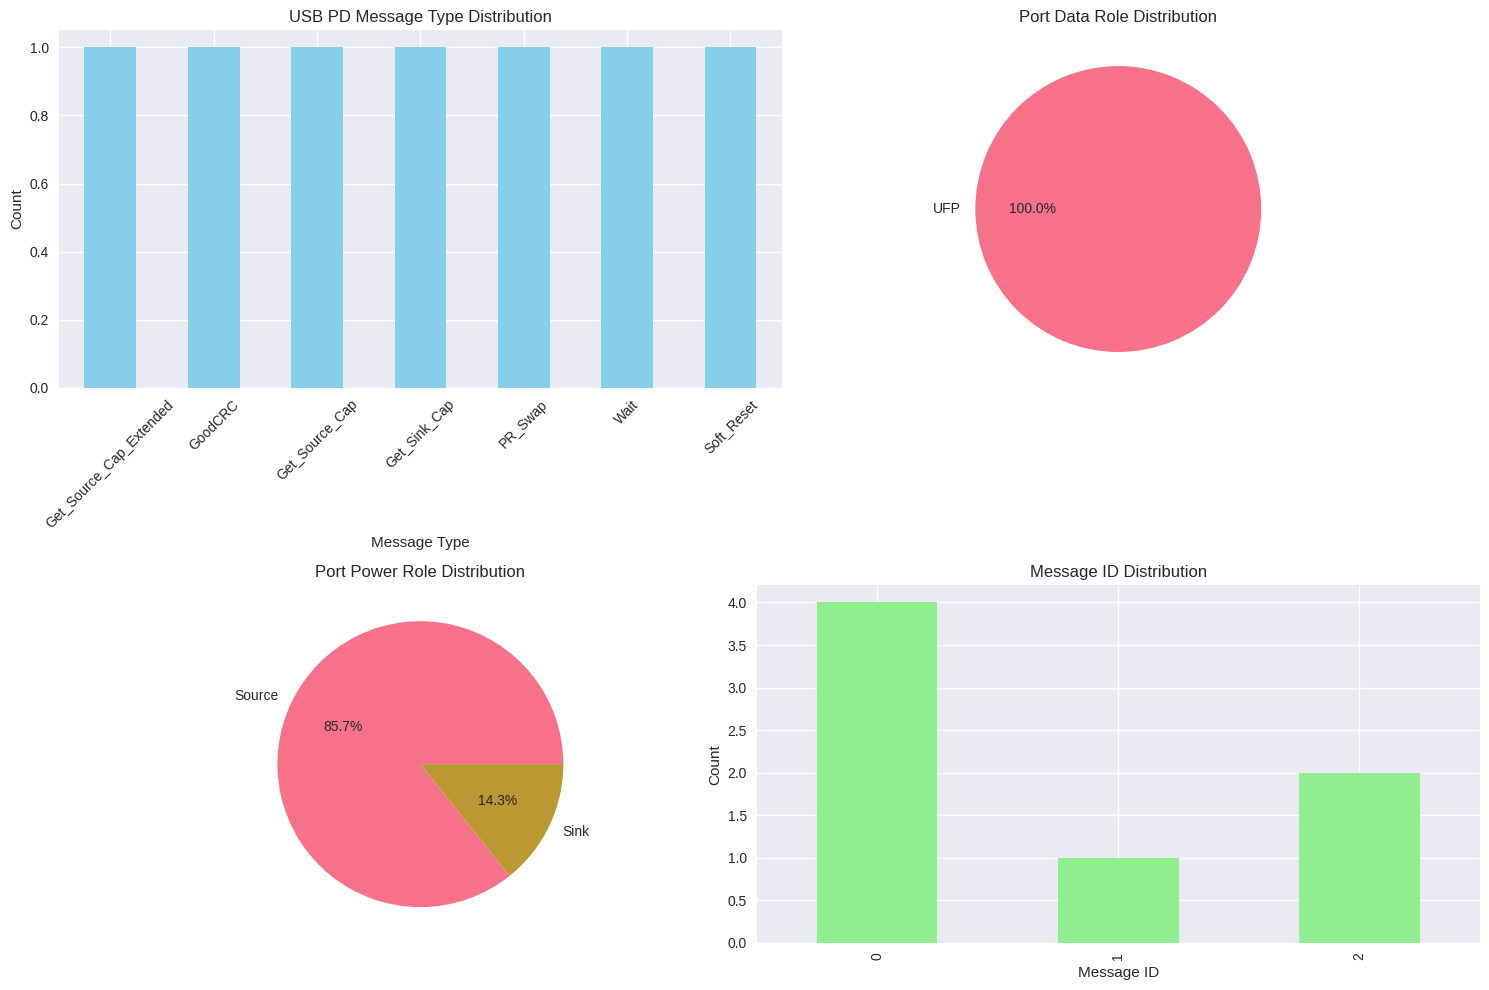

In [6]:
# Create visualizations
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))

# 1. Message Type Distribution
type_counts.plot(kind='bar', ax=ax1, color='skyblue')
ax1.set_title('USB PD Message Type Distribution')
ax1.set_xlabel('Message Type')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# 2. Data Role Distribution  
df['data_role'].value_counts().plot(kind='pie', ax=ax2, autopct='%1.1f%%')
ax2.set_title('Port Data Role Distribution')
ax2.set_ylabel('')

# 3. Power Role Distribution
df['power_role'].value_counts().plot(kind='pie', ax=ax3, autopct='%1.1f%%')
ax3.set_title('Port Power Role Distribution')
ax3.set_ylabel('')

# 4. Message ID Distribution
df['message_id'].value_counts().sort_index().plot(kind='bar', ax=ax4, color='lightgreen')
ax4.set_title('Message ID Distribution')
ax4.set_xlabel('Message ID')
ax4.set_ylabel('Count')

plt.tight_layout()
plt.show()


## Advanced Usage: Batch Processing


In [ ]:
# Example: Process a larger dataset of USB PD messages
import random

# Generate sample data (in real usage, this would come from PCAPNG files or logs)
sample_message_types = [
    ("1161", "Get_Source_Cap_Extended"),
    ("0143", "GoodCRC"), 
    ("0744", "Get_Source_Cap"),
    ("0865", "Get_Sink_Cap"),
    ("0A01", "PR_Swap"),
    ("0C01", "Wait"),
    ("0D01", "Soft_Reset"),
    ("1001", "Not_Supported"),
    ("0601", "PS_RDY"),
]

# Create a larger sample dataset
large_dataset = []
for _ in range(100):
    hex_msg, expected_name = random.choice(sample_message_types)
    # Add some variation to message ID
    msg_bytes = list(usbpdpy.hex_to_bytes(hex_msg))
    msg_bytes[1] = (msg_bytes[1] & 0xF1) | (random.randint(0, 7) << 1)  # Vary message ID
    varied_hex = usbpdpy.bytes_to_hex(bytes(msg_bytes))
    large_dataset.append(varied_hex)

print(f"📊 Processing {len(large_dataset)} USB PD messages...")

# Batch process using usbpdpy
results = []
errors = 0

for i, hex_msg in enumerate(large_dataset):
    try:
        msg_bytes = usbpdpy.hex_to_bytes(hex_msg)
        message = usbpdpy.parse_pd_message(msg_bytes)
        
        results.append({
            'index': i,
            'hex': hex_msg,
            'type': message.header.message_type,
            'name': usbpdpy.get_message_type_name(message.header.message_type),
            'data_role': message.header.port_data_role,
            'power_role': message.header.port_power_role,
            'message_id': message.header.message_id,
        })
    except Exception as e:
        errors += 1

# Create DataFrame and analyze
df_large = pd.DataFrame(results)

print(f"✅ Successfully processed: {len(results)} messages")
print(f"❌ Errors: {errors}")
print(f"\n📈 Large Dataset Statistics:")
print(f"  Message types found: {df_large['name'].nunique()}")
print(f"  Most common: {df_large['name'].value_counts().head()}")

# Show processing speed
print(f"\n⚡ Performance: Processed {len(large_dataset)} messages using fast Rust backend!")


## Error Handling and Edge Cases


In [ ]:
# Test error handling with various invalid inputs
test_cases = [
    ("", "Empty string"),
    ("1", "Too short hex"),
    ("invalid", "Invalid hex characters"),
    ("G1", "Invalid hex character G"),
    ("1161FF", "Valid hex but might be too long for message"),
]

print("🧪 Testing Error Handling:")
print("=" * 40)

for test_input, description in test_cases:
    try:
        if test_input:
            msg_bytes = usbpdpy.hex_to_bytes(test_input)
            message = usbpdpy.parse_pd_message(msg_bytes)
            print(f"✅ '{test_input}' ({description}): Success - {usbpdpy.get_message_type_name(message.header.message_type)}")
        else:
            # Handle empty string case
            msg_bytes = usbpdpy.hex_to_bytes(test_input)
            print(f"✅ '{test_input}' ({description}): Empty bytes returned")
    except Exception as e:
        print(f"❌ '{test_input}' ({description}): {type(e).__name__}: {e}")

print("\n🔍 Message Type Lookup Tests:")
for msg_type in [0, 1, 7, 25, 255]:
    name = usbpdpy.get_message_type_name(msg_type)
    print(f"  Type {msg_type:3d}: {name}")


## Summary

This notebook demonstrates the key features of the `usbpdpy` package:

### ✅ **What We Covered:**
- **Basic message parsing** from hex strings to structured data
- **Batch processing** of multiple messages efficiently  
- **Data analysis** using pandas DataFrames
- **Visualization** of USB PD message patterns
- **Error handling** for invalid inputs
- **Performance** benefits of Rust-powered parsing

### 🚀 **Key Benefits:**
- **Fast parsing** using Rust backend
- **Simple Python API** for easy integration
- **Comprehensive message type support** 
- **Robust error handling**
- **Zero runtime dependencies**

### 📊 **Use Cases:**
- USB PD protocol analysis and reverse engineering
- PCAPNG file processing and analysis  
- Real-time USB PD message monitoring
- Protocol compliance testing
- Research and development

The `usbpdpy` package provides a powerful foundation for USB Power Delivery analysis in Python!
